In [1]:
import numpy as np
import matplotlib.pylab as mp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget
%matplotlib inline

import os

In [2]:
# give directories of datafiles
base = "/home/thanasis/repos/BSWP/Papers/GaugeBondiHyp/anc/numerics/data/"

smooth_WH  = np.load("%ssmooth_WH.npz" % (base))
smooth_SH  = np.load("%ssmooth_SH.npz" % (base))
noise_WH  = np.load("%snoise_WH.npz" % (base))
noise_SH  = np.load("%snoise_SH.npz" % (base))


In [3]:
# load data
t = smooth_WH['t']

smooth_full01_WH = smooth_WH['full01']
smooth_full12_WH = smooth_WH['full12']
smooth_full23_WH = smooth_WH['full23']

smooth_full01_SH = smooth_SH['full01']
smooth_full12_SH = smooth_SH['full12']
smooth_full23_SH = smooth_SH['full23']

noise_full00_WH = noise_WH['full00']
noise_full01_WH = noise_WH['full01']
noise_full02_WH = noise_WH['full02']
noise_null00_WH = noise_WH['null00']
noise_null01_WH = noise_WH['null01']
noise_null02_WH = noise_WH['null02']
noise_J00_WH = noise_WH['Jnorm00']
noise_J01_WH = noise_WH['Jnorm01']
noise_J02_WH = noise_WH['Jnorm02']

noise_full00_SH = noise_SH['full00']
noise_full01_SH = noise_SH['full01']
noise_full02_SH = noise_SH['full02']
noise_null00_SH = noise_SH['null00']
noise_null01_SH = noise_SH['null01']
noise_null02_SH = noise_SH['null02']
noise_J00_SH = noise_SH['Jnorm00']
noise_J01_SH = noise_SH['Jnorm01']
noise_J02_SH = noise_SH['Jnorm02']

In [4]:
self_conv_full_012_WH = np.log2(smooth_full01_WH/smooth_full12_WH)
self_conv_full_123_WH = np.log2(smooth_full12_WH/smooth_full23_WH)

self_conv_full_012_SH = np.log2(smooth_full01_SH/smooth_full12_SH)
self_conv_full_123_SH = np.log2(smooth_full12_SH/smooth_full23_SH)

exact_conv_full_01_WH = np.log2(noise_full00_WH/noise_full01_WH)
exact_conv_full_12_WH = np.log2(noise_full01_WH/noise_full02_WH)

exact_conv_full_01_SH = np.log2(noise_full00_SH/noise_full01_SH)
exact_conv_full_12_SH = np.log2(noise_full01_SH/noise_full02_SH)

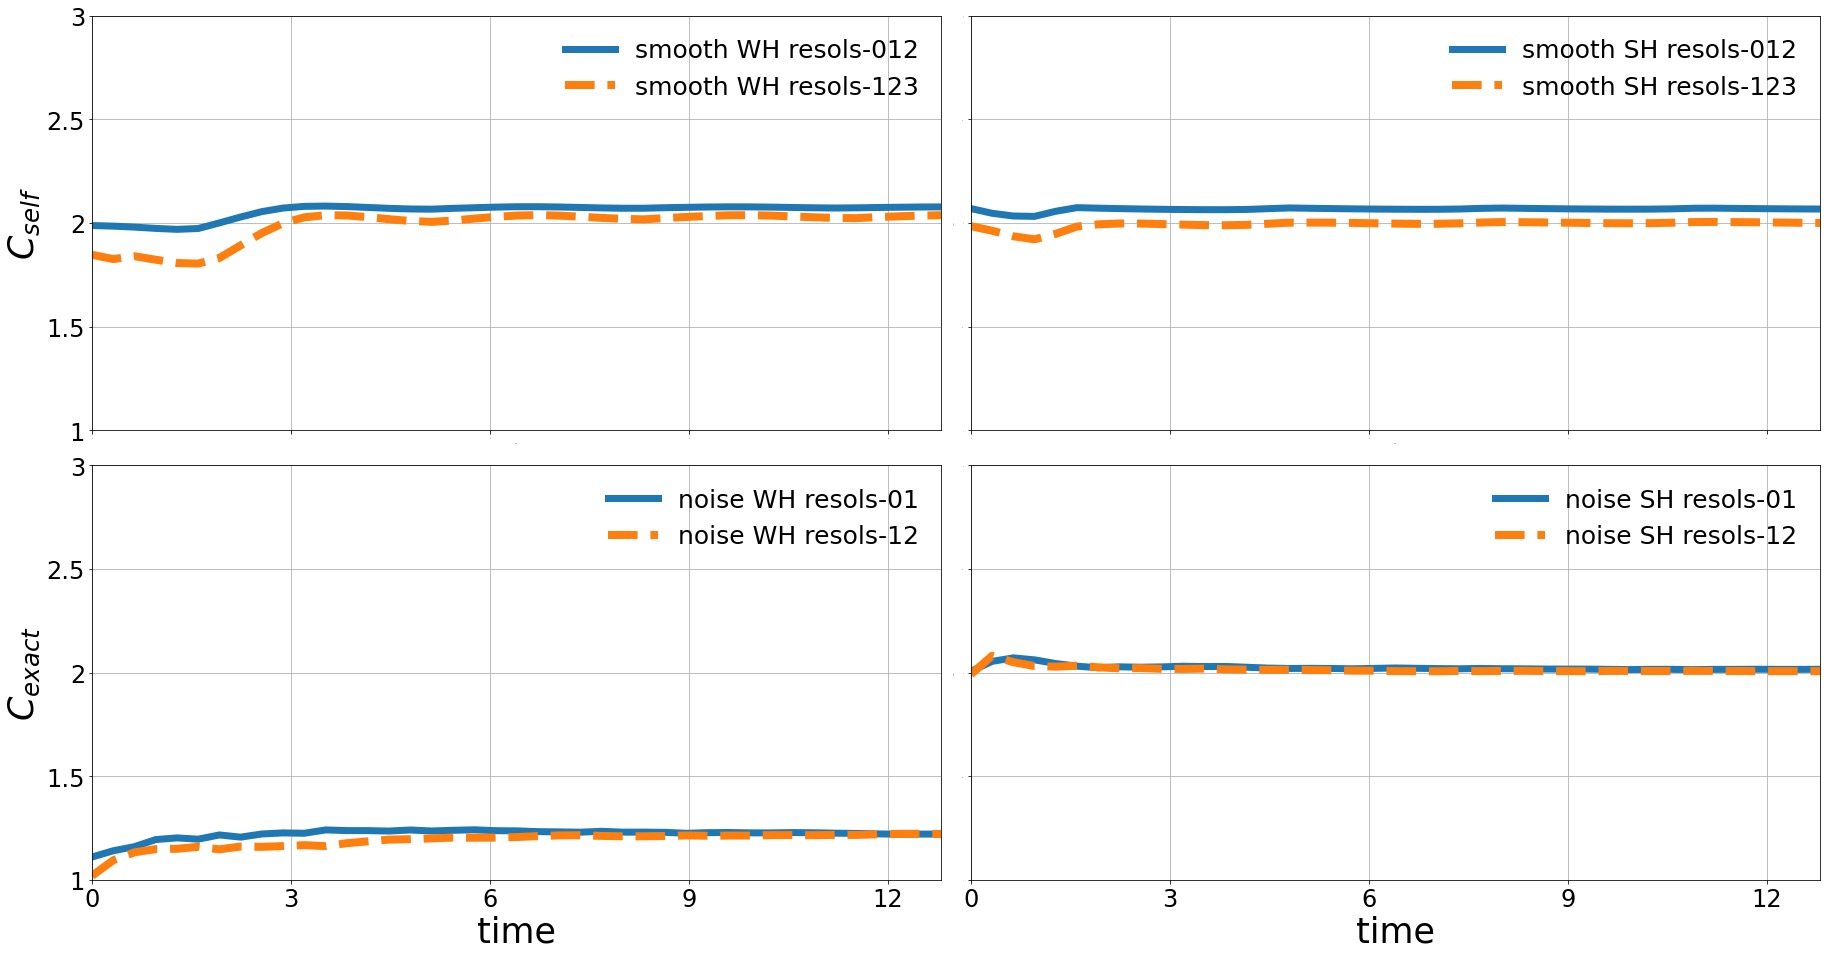

In [5]:
fig = mp.figure(figsize=(24,12))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_xlabel('time', fontsize=0)
ax1.set_ylabel('$C_{self}$', fontsize=35)
ax1.set_xlim(0,12.8)
ax1.set_xticks([0,3,6,9,12])
ax1.set_xticklabels(('0','3','6','9','12'), fontsize=0)
ax1.set_ylim(1,3)
ax1.set_yticks([1,1.5,2,2.5,3])
ax1.set_yticklabels(('1','1.5','2','2.5','3'), fontsize=24)
#ax1.text(0, 1, "High res", fontsize=24)
ax1.grid()
ax1.plot(t, self_conv_full_012_WH, label='smooth WH resols-012',linewidth=7.0)
ax1.plot(t, self_conv_full_123_WH, label='smooth WH resols-123',linewidth=8.0,linestyle='dashed')

ax2.set_xlabel('time', fontsize=0)
ax2.set_ylabel('$C_{exact}$', fontsize=0)
ax2.set_xlim(0,12.8)
ax2.set_xticks([0,3,6,9,12])
ax2.set_xticklabels(('0','3','6','9','12'), fontsize=0)
ax2.set_ylim(1,3)
ax2.set_yticks([1,1.5,2,2.5,3])
ax2.set_yticklabels(('1','1.5','2','2.5','3'), fontsize=0)
ax2.grid()
ax2.plot(t, self_conv_full_012_SH, label='smooth SH resols-012',linewidth=7.0)
ax2.plot(t, self_conv_full_123_SH, label='smooth SH resols-123',linewidth=8.0,linestyle='dashed')

ax3.set_xlabel('time', fontsize=35)
ax3.set_ylabel('$C_{exact}$', fontsize=35)
ax3.set_xlim(0,12.8)
ax3.set_xticks([0,3,6,9,12])
ax3.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax3.set_ylim(1,3)
ax3.set_yticks([1,1.5,2,2.5,3])
ax3.set_yticklabels(('1','1.5','2','2.5','3'), fontsize=24)
ax3.grid()
ax3.plot(t, exact_conv_full_01_WH, label='noise WH resols-01',linewidth=7.0)
ax3.plot(t, exact_conv_full_12_WH, label='noise WH resols-12',linewidth=8.0,linestyle='dashed')

ax4.set_xlabel('time', fontsize=35)
ax4.set_ylabel('$C_{exact}$', fontsize=0)
ax4.set_xlim(0,12.8)
ax4.set_xticks([0,3,6,9,12])
ax4.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax4.set_ylim(1,3)
ax4.set_yticks([1,1.5,2,2.5,3])
ax4.set_yticklabels(('1','1.5','2','2.5','3'), fontsize=0)
ax4.grid()
ax4.plot(t, exact_conv_full_01_SH, label='noise SH resols-01',linewidth=7.0)
ax4.plot(t, exact_conv_full_12_SH, label='noise SH resols-12',linewidth=8.0,linestyle='dashed')

ax1.legend(frameon=False, fontsize = 25)
ax2.legend(frameon=False, fontsize = 25)
ax3.legend(frameon=False, fontsize = 25)
ax4.legend(frameon=False, fontsize = 25)

plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1, 
                    top=1, 
                    wspace=0.035, 
                    hspace=0.085)

plt.show()

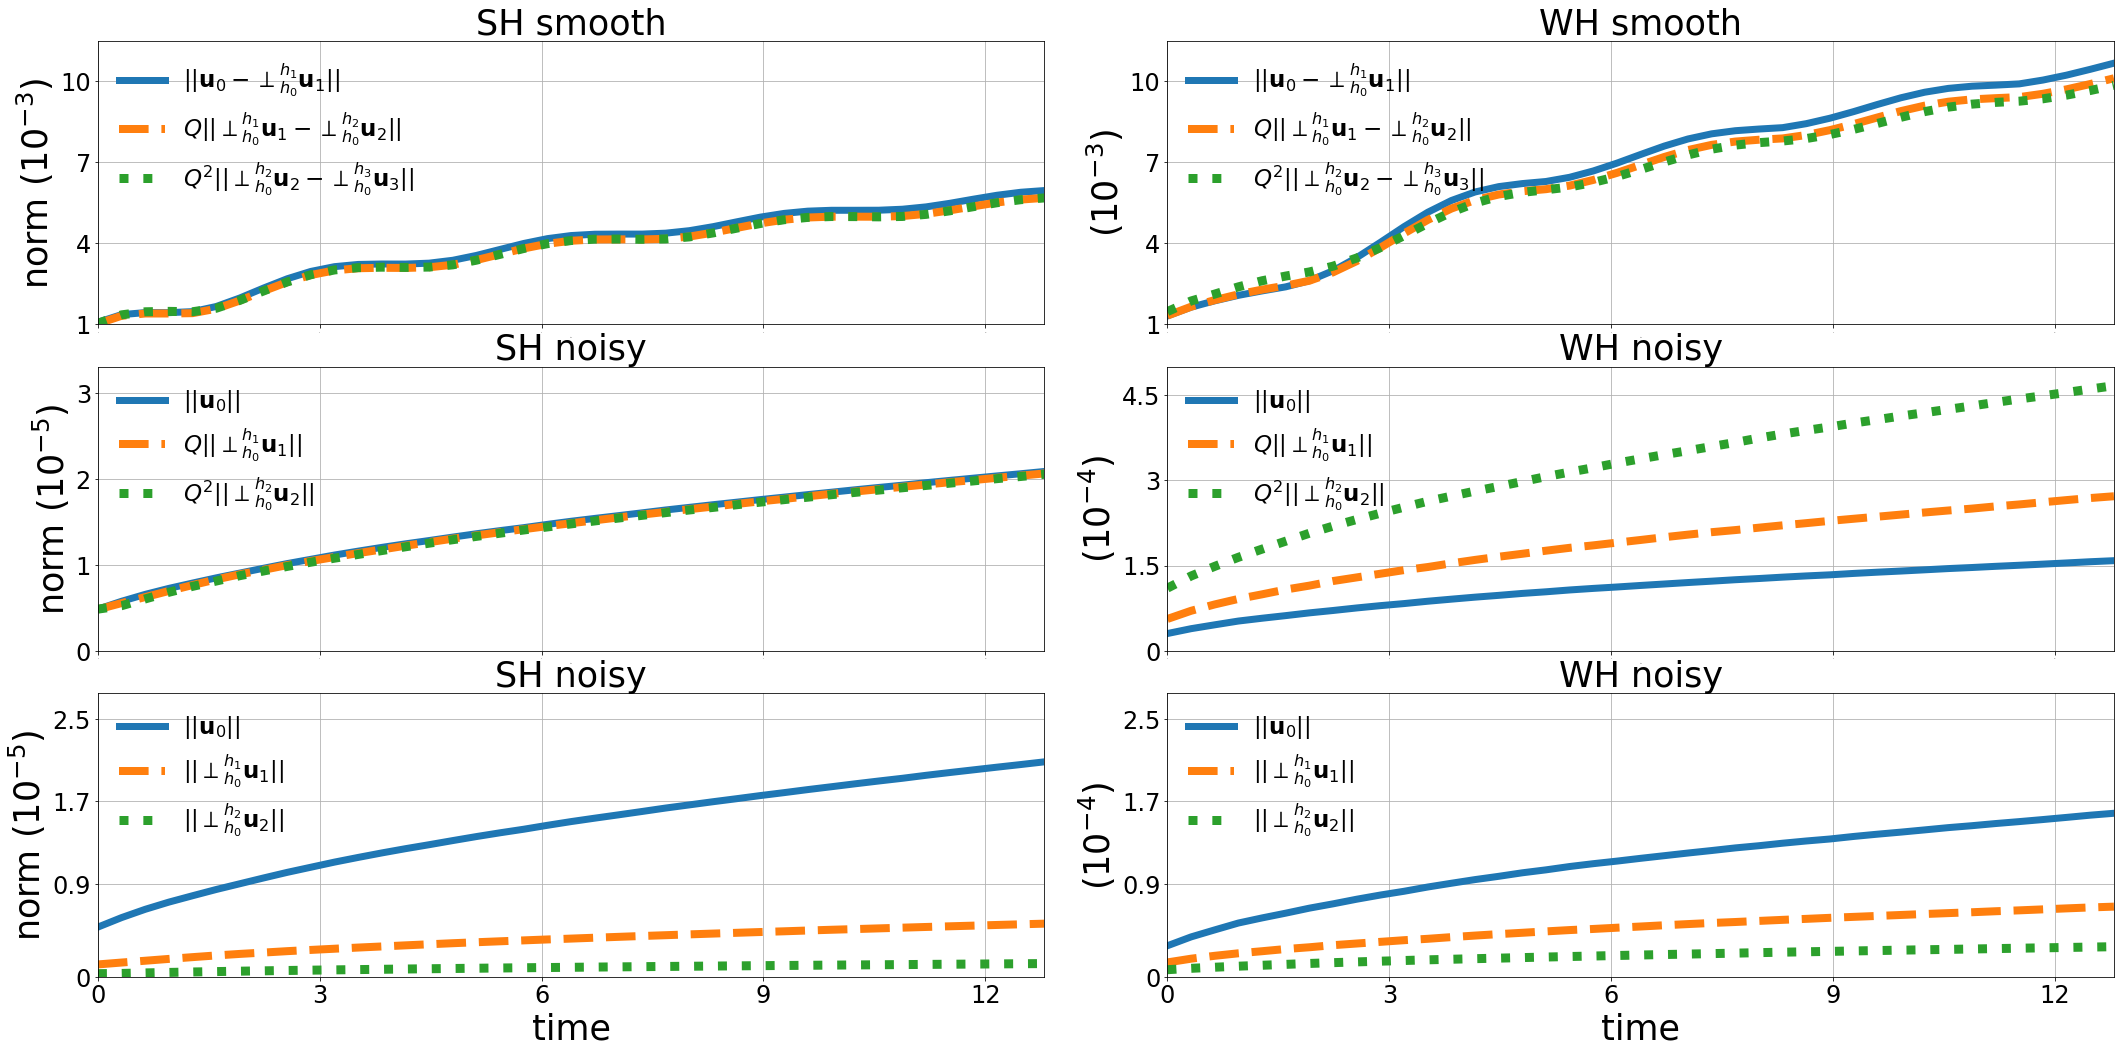

In [24]:
fig = mp.figure(figsize=(28,13))

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

ax1.set_title('SH smooth', fontsize=35)
ax1.set_xlabel('time', fontsize=0)
ax1.set_ylabel('norm $(10^{-3})$', fontsize=35)
ax1.set_xlim(0,12.8)
ax1.set_xticks([0,3,6,9,12])
ax1.set_xticklabels(('0','3','6','9','12'), fontsize=0)
ax1.set_ylim(0.001,0.0115)
ax1.set_yticks([0.001,0.004,0.007,0.01])
ax1.set_yticklabels(('1','4','7','10'), fontsize=24)
ax1.grid()
ax1.plot(t, smooth_full01_SH, label='$||\mathbf{u}_0 - \perp_{h_0}^{h_1} \mathbf{u}_1||$',linewidth=7.0)
ax1.plot(t, 4*smooth_full12_SH, 
         label='$Q ||\perp_{h_0}^{h_1} \mathbf{u}_1 - \perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=8.0,linestyle='dashed')
ax1.plot(t, 16*smooth_full23_SH, 
         label='$Q^2 ||\perp_{h_0}^{h_2} \mathbf{u}_2 - \perp_{h_0}^{h_3} \mathbf{u}_3||$',
         linewidth=9.0,linestyle='dotted')

ax2.set_title('WH smooth', fontsize=35)
ax2.set_xlabel('time', fontsize=0)
ax2.set_ylabel('$(10^{-3})$', fontsize=35)
ax2.set_xlim(0,12.8)
ax2.set_xticks([0,3,6,9,12])
ax2.set_xticklabels(('0','3','6','9','12'), fontsize=0)
ax2.set_ylim(0.001,0.0115)
ax2.set_yticks([0.001,0.004,0.007,0.01])
ax2.set_yticklabels(('1','4','7','10'), fontsize=24)
ax2.grid()
ax2.plot(t, smooth_full01_WH, label='$||\mathbf{u}_0 - \perp_{h_0}^{h_1} \mathbf{u}_1||$',linewidth=7.0)
ax2.plot(t, 4*smooth_full12_WH, 
         label='$Q ||\perp_{h_0}^{h_1} \mathbf{u}_1 - \perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=8.0,linestyle='dashed')
ax2.plot(t, 16*smooth_full23_WH, 
         label='$Q^2 ||\perp_{h_0}^{h_2} \mathbf{u}_2 - \perp_{h_0}^{h_3} \mathbf{u}_3||$',
         linewidth=9.0,linestyle='dotted')

ax3.set_title('SH noisy', fontsize=35)
ax3.set_xlabel('time', fontsize=0)
ax3.set_ylabel('norm $(10^{-5})$', fontsize=35)
ax3.set_xlim(0,12.8)
ax3.set_xticks([0,3,6,9,12])
ax3.set_xticklabels(('0','3','6','9','12'), fontsize=0)
ax3.set_ylim(0.0,0.000033)
ax3.set_yticks([0,0.00001,0.00002,0.00003])
ax3.set_yticklabels(('0','1','2','3'), fontsize=24)
ax3.grid()
ax3.plot(t, noise_full00_SH, label='$||\mathbf{u}_0||$',linewidth=7.0)
ax3.plot(t, 4*noise_full01_SH, label='$Q ||\perp_{h_0}^{h_1} \mathbf{u}_1||$',
         linewidth=8.0,linestyle='dashed')
ax3.plot(t, 16*noise_full02_SH, label='$Q^2 ||\perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=9.0,linestyle='dotted')

ax4.set_title('WH noisy', fontsize=35)
ax4.set_xlabel('time', fontsize=0)
ax4.set_ylabel('$(10^{-4})$', fontsize=35)
ax4.set_xlim(0,12.8)
ax4.set_xticks([0,3,6,9,12])
ax4.set_xticklabels(('0','3','6','9','12'), fontsize=0)
ax4.set_ylim(0.0,0.0005)
ax4.set_yticks([0.0,0.00015, 0.0003, 0.00045])
ax4.set_yticklabels(('0','$1.5$','3','4.5'), fontsize=24)
ax4.grid()
ax4.plot(t, noise_full00_WH, label='$||\mathbf{u}_0||$',linewidth=7.0)
ax4.plot(t, 4*noise_full01_WH, label='$Q ||\perp_{h_0}^{h_1} \mathbf{u}_1||$',
         linewidth=8.0,linestyle='dashed')
ax4.plot(t, 16*noise_full02_WH, label='$Q^2 ||\perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=9.0,linestyle='dotted')

ax5.set_title('SH noisy', fontsize=35)
ax5.set_xlabel('time', fontsize=35)
ax5.set_ylabel('norm $(10^{-5})$', fontsize=35)
ax5.set_xlim(0,12.8)
ax5.set_xticks([0,3,6,9,12])
ax5.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax5.set_ylim(0.0,0.0000275)
ax5.set_yticks([0,0.000009,0.000017,0.000025])
ax5.set_yticklabels(('0','0.9','1.7','2.5'), fontsize=24)
ax5.grid()
ax5.plot(t, noise_full00_SH, label='$||\mathbf{u}_0||$',linewidth=7.0)
ax5.plot(t, noise_full01_SH, label='$||\perp_{h_0}^{h_1} \mathbf{u}_1||$',
         linewidth=8.0,linestyle='dashed')
ax5.plot(t, noise_full02_SH, label='$||\perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=9.0,linestyle='dotted')

ax6.set_title('WH noisy', fontsize=35)
ax6.set_xlabel('time', fontsize=35)
ax6.set_ylabel('$(10^{-4})$', fontsize=35)
ax6.set_xlim(0,12.8)
ax6.set_xticks([0,3,6,9,12])
ax6.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax6.set_ylim(0.0,0.000275)
ax6.set_yticks([0.0,0.00009, 0.00017, 0.00025])
ax6.set_yticklabels(('0','0.9','1.7','2.5'), fontsize=24)
ax6.grid()
ax6.plot(t, noise_full00_WH, label='$||\mathbf{u}_0||$',linewidth=7.0)
ax6.plot(t, noise_full01_WH, label='$||\perp_{h_0}^{h_1} \mathbf{u}_1||$',
         linewidth=8.0,linestyle='dashed')
ax6.plot(t, noise_full02_WH, label='$||\perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=9.0,linestyle='dotted')

ax1.legend(frameon=False, fontsize = 23, loc = 2)
ax2.legend(frameon=False, fontsize = 23, loc = 2)
ax3.legend(frameon=False, fontsize = 23, loc = 2)
ax4.legend(frameon=False, fontsize = 23, loc = 2)
ax5.legend(frameon=False, fontsize = 23, loc = 2)
ax6.legend(frameon=False, fontsize = 23, loc = 2)

plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1, 
                    top=1, 
                    wspace=0.13, 
                    hspace=0.15)

plt.show()
fig.savefig('/home/thanasis/repos/BSWP/Papers/GaugeBondiHyp/images/norms_all.pdf', bbox_inches='tight')

In [7]:
plt.plot(t, noise_null00_WH)
plt.plot(t, 4*noise_null01_WH)
plt.plot(t, 4*4*noise_null02_WH)


In [8]:
fig = mp.figure(figsize=(24,7))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.set_title('SH noisy', fontsize=35)
ax1.set_xlabel('time', fontsize=35)
ax1.set_ylabel('norm $(10^{-6})$', fontsize=35)
ax1.set_xlim(0,12.8)
ax1.set_xticks([0,3,6,9,12])
ax1.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax1.set_ylim(0.0*1e-6,2.0*1e-6)
ax1.set_yticks([0.0*1e-6,0.5*1e-6, 1.0*1e-6, 1.5*1e-6, 2.0*1e-6])
ax1.set_yticklabels(('0','0.5','1.0','1.5','2.0'), fontsize=24)
ax1.grid()
ax1.plot(t, noise_null00_SH, label='$||\mathbf{u}_0||_{null}$',linewidth=7.0)
ax1.plot(t, 4*noise_null01_SH, label='$Q ||\perp_{h_0}^{h_1} \mathbf{u}_1||_{null}$',
         linewidth=8.0,linestyle='dashed')
ax1.plot(t, 16*noise_null02_SH, label='$Q^2 ||\perp_{h_0}^{h_2} \mathbf{u}_2||_{null}$',
         linewidth=9.0,linestyle='dotted')

ax2.set_title('WH noisy', fontsize=35)
ax2.set_xlabel('time', fontsize=35)
ax2.set_ylabel('$(10^{-6})$', fontsize=0)
ax2.set_xlim(0,12.8)
ax2.set_xticks([0,3,6,9,12])
ax2.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax2.set_ylim(0.0*1e-6,2.0*1e-6)
ax2.set_yticks([0.0*1e-6,0.5*1e-6, 1.0*1e-6, 1.5*1e-6, 2.0*1e-6])
ax2.set_yticklabels(('0','0.5','1.0','1.5','2.0'), fontsize=0)
ax2.grid()
ax2.plot(t, noise_null00_WH, label='$||\mathbf{u}_0||$',linewidth=7.0)
ax2.plot(t, 4*noise_null01_WH, label='$Q ||\perp_{h_0}^{h_1} \mathbf{u}_1||$',
         linewidth=8.0,linestyle='dashed')
ax2.plot(t, 16*noise_null02_WH, label='$Q^2 ||\perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=9.0,linestyle='dotted')

ax1.legend(frameon=False, fontsize = 23, loc = 0)
#ax2.legend(frameon=False, fontsize = 22, loc = 1)

plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1, 
                    top=1, 
                    wspace=0.05, 
                    hspace=0.15)

plt.show()
fig.savefig('/home/thanasis/repos/BSWP/Papers/drafts/images/null_noisy_norms.pdf', bbox_inches='tight')

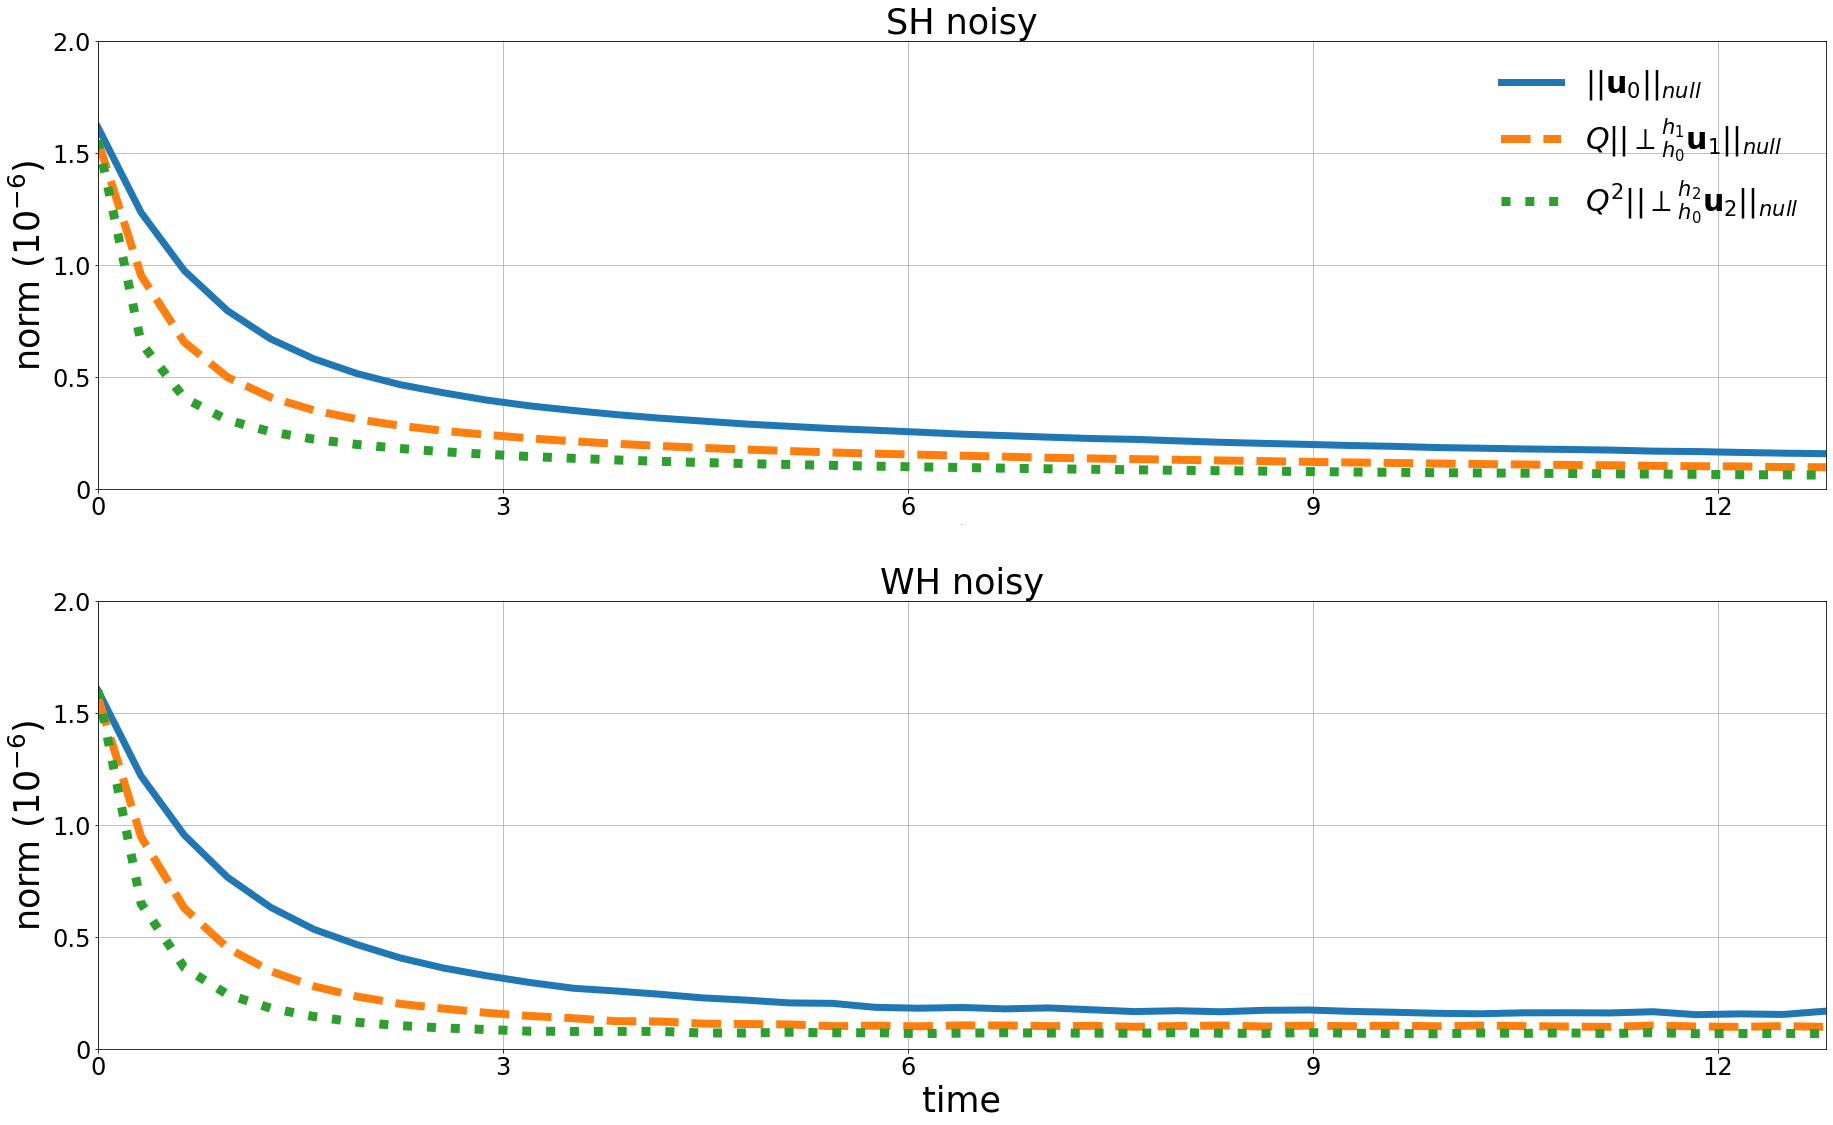

In [9]:
fig = mp.figure(figsize=(24,14))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.set_title('SH noisy', fontsize=35)
ax1.set_xlabel('time', fontsize=0)
ax1.set_ylabel('norm $(10^{-6})$', fontsize=35)
ax1.set_xlim(0,12.8)
ax1.set_xticks([0,3,6,9,12])
ax1.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax1.set_ylim(0.0*1e-6,2.0*1e-6)
ax1.set_yticks([0.0*1e-6,0.5*1e-6, 1.0*1e-6, 1.5*1e-6, 2.0*1e-6])
ax1.set_yticklabels(('0','0.5','1.0','1.5','2.0'), fontsize=24)
ax1.grid()
ax1.plot(t, noise_null00_SH, label='$||\mathbf{u}_0||_{null}$',linewidth=7.0)
ax1.plot(t, 4*noise_null01_SH, label='$Q ||\perp_{h_0}^{h_1} \mathbf{u}_1||_{null}$',
         linewidth=8.0,linestyle='dashed')
ax1.plot(t, 16*noise_null02_SH, label='$Q^2 ||\perp_{h_0}^{h_2} \mathbf{u}_2||_{null}$',
         linewidth=9.0,linestyle='dotted')

ax2.set_title('WH noisy', fontsize=35)
ax2.set_xlabel('time', fontsize=35)
ax2.set_ylabel('norm $(10^{-6})$', fontsize=35)
ax2.set_xlim(0,12.8)
ax2.set_xticks([0,3,6,9,12])
ax2.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax2.set_ylim(0.0*1e-6,2.0*1e-6)
ax2.set_yticks([0.0*1e-6,0.5*1e-6, 1.0*1e-6, 1.5*1e-6, 2.0*1e-6])
ax2.set_yticklabels(('0','0.5','1.0','1.5','2.0'), fontsize=24)
ax2.grid()
ax2.plot(t, noise_null00_WH, label='$||\mathbf{u}_0||$',linewidth=7.0)
ax2.plot(t, 4*noise_null01_WH, label='$Q ||\perp_{h_0}^{h_1} \mathbf{u}_1||$',
         linewidth=8.0,linestyle='dashed')
ax2.plot(t, 16*noise_null02_WH, label='$Q^2 ||\perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=9.0,linestyle='dotted')

ax1.legend(frameon=False, fontsize = 30, loc = 0)
#ax2.legend(frameon=False, fontsize = 22, loc = 1)

plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1, 
                    top=1, 
                    wspace=0.05, 
                    hspace=0.25)

plt.show()
#fig.savefig('/home/thanasis/repos/BSWP/data/norms_all/null_noisy_norms_beamer.pdf', bbox_inches='tight')

In [6]:
fig = mp.figure(figsize=(24,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title('SH smooth', fontsize=35)
ax1.set_xlabel('time', fontsize=0)
ax1.set_ylabel('norm $(10^{-3})$', fontsize=35)
ax1.set_xlim(0,12.8)
ax1.set_xticks([0,3,6,9,12])
ax1.set_xticklabels(('0','3','6','9','12'), fontsize=0)
ax1.set_ylim(0.001,0.0115)
ax1.set_yticks([0.001,0.004,0.007,0.01])
ax1.set_yticklabels(('1','4','7','10'), fontsize=24)
ax1.grid()
ax1.plot(t, smooth_full01_SH, label='$||\mathbf{u}_0 - \perp_{h_0}^{h_1} \mathbf{u}_1||$',linewidth=7.0)
ax1.plot(t, smooth_full12_SH, 
         label='$||\perp_{h_0}^{h_1} \mathbf{u}_1 - \perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=8.0,linestyle='dashed')
ax1.plot(t, smooth_full23_SH, 
         label='$||\perp_{h_0}^{h_2} \mathbf{u}_2 - \perp_{h_0}^{h_3} \mathbf{u}_3||$',
         linewidth=9.0,linestyle='dotted')

ax2.set_title('WH smooth', fontsize=35)
ax2.set_xlabel('time', fontsize=0)
ax2.set_ylabel('$(10^{-3})$', fontsize=35)
ax2.set_xlim(0,12.8)
ax2.set_xticks([0,3,6,9,12])
ax2.set_xticklabels(('0','3','6','9','12'), fontsize=0)
ax2.set_ylim(0.001,0.0115)
ax2.set_yticks([0.001,0.004,0.007,0.01])
ax2.set_yticklabels(('1','4','7','10'), fontsize=24)
ax2.grid()
ax2.plot(t, smooth_full01_WH, label='$||\mathbf{u}_0 - \perp_{h_0}^{h_1} \mathbf{u}_1||$',linewidth=7.0)
ax2.plot(t, smooth_full12_WH, 
         label='$||\perp_{h_0}^{h_1} \mathbf{u}_1 - \perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=8.0,linestyle='dashed')
ax2.plot(t, smooth_full23_WH, 
         label='$||\perp_{h_0}^{h_2} \mathbf{u}_2 - \perp_{h_0}^{h_3} \mathbf{u}_3||$',
         linewidth=9.0,linestyle='dotted')

ax3.set_title('SH noisy', fontsize=35)
ax3.set_xlabel('time', fontsize=35)
ax3.set_ylabel('norm $(10^{-5})$', fontsize=35)
ax3.set_xlim(0,12.8)
ax3.set_xticks([0,3,6,9,12])
ax3.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax3.set_ylim(0.0,0.000033)
ax3.set_yticks([0,0.00001,0.00002,0.00003])
ax3.set_yticklabels(('0','1','2','3'), fontsize=24)
ax3.grid()
ax3.plot(t, noise_full00_SH, label='$||\mathbf{u}_0||$',linewidth=7.0)
ax3.plot(t, noise_full01_SH, label='$||\perp_{h_0}^{h_1} \mathbf{u}_1||$',
         linewidth=8.0,linestyle='dashed')
ax3.plot(t, noise_full02_SH, label='$||\perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=9.0,linestyle='dotted')

ax4.set_title('WH noisy', fontsize=35)
ax4.set_xlabel('time', fontsize=35)
ax4.set_ylabel('$(10^{-4})$', fontsize=35)
ax4.set_xlim(0,12.8)
ax4.set_xticks([0,3,6,9,12])
ax4.set_xticklabels(('0','3','6','9','12'), fontsize=24)
ax4.set_ylim(0.0,0.0005)
ax4.set_yticks([0.0,0.00015, 0.0003, 0.00045])
ax4.set_yticklabels(('0','$1.5$','3','4.5'), fontsize=24)
ax4.grid()
ax4.plot(t, noise_full00_WH, label='$||\mathbf{u}_0||$',linewidth=7.0)
ax4.plot(t, noise_full01_WH, label='$||\perp_{h_0}^{h_1} \mathbf{u}_1||$',
         linewidth=8.0,linestyle='dashed')
ax4.plot(t, noise_full02_WH, label='$||\perp_{h_0}^{h_2} \mathbf{u}_2||$',
         linewidth=9.0,linestyle='dotted')

ax1.legend(frameon=False, fontsize = 23, loc = 2)
ax2.legend(frameon=False, fontsize = 23, loc = 2)
ax3.legend(frameon=False, fontsize = 23, loc = 2)
ax4.legend(frameon=False, fontsize = 23, loc = 2)

plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=1, 
                    top=1, 
                    wspace=0.13, 
                    hspace=0.15)

plt.show()
#fig.savefig('/home/thanasis/repos/BSWP/Papers/drafts/images/norms_all.pdf', bbox_inches='tight')